In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

## Autoreload
https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 1

In [39]:
%aimport

Modules to reload:
RUL_Model

Modules to skip:



In [40]:
%aimport RUL_Model

In [41]:
%aimport

Modules to reload:
RUL_Model

Modules to skip:



In [42]:
def plot_predictions(rul_filename, predictions):
    rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
    rul_true.columns = ['True', '']
    rul_true['Predicted'] = predictions
    rul_true = rul_true[['True', 'Predicted']]

    plt.figure(figsize=(7,4))
    plt.scatter(rul_true['True'], rul_true['Predicted'])
    plt.ylabel('Predicted RUL')
    plt.xlabel('True RUL')
    plt.title('Comparing Model Projections to Baseline')

def run(file_number):
    test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
    test_df = RUL_Model.preprocess_and_predict(test_df)
    predictions = RUL_Model.summarize_predictions_by_unit(test_df)
    print("Number of predictions:", len(predictions))
    plot_predictions('Data/RUL_FD00{}.txt'.format(file_number), predictions=predictions)

## Baseline Saved Model

Number of predictions: 100


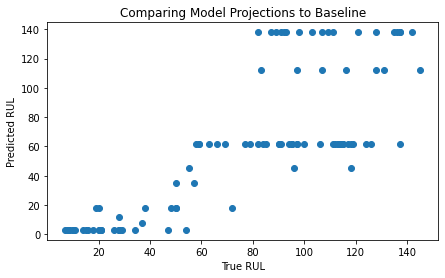

In [43]:
run(1)

In [44]:
train_df = pd.read_csv('Data/train_FD001.txt', sep=" ", header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


## Demonstrating Automated Retraining

In [46]:
x_train_img, y_train = RUL_Model.preprocess_train(train_df, w=[5])
model = RUL_Model.train_model(x_train_img, y_train, w=[5])
model.save('ClassifierV3_AutomatedRetraining.h5')


#id: 100
Epoch 1/25
25/25 - 32s - loss: 0.2883 - accuracy: 0.9494 - val_loss: 0.1870 - val_accuracy: 0.9654
Epoch 2/25


KeyboardInterrupt: 

In [23]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Compare Predictions to Previously Loaded Model

In [ ]:
file_number = 1
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('Data/RUL_FD00{}.txt'.format(file_number), predictions=predictions)

In [ ]:
run(2)

## Applying Model Predictions to Second Dataset

In [ ]:
file_number = 2
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('Data/RUL_FD00{}.txt'.format(file_number), predictions=predictions)

In [ ]:
run(3)

In [ ]:
file_number = 3
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('Data/RUL_FD00{}.txt'.format(file_number), predictions=predictions)

## Retrain with Simple Binary Classification

In [ ]:
x_train_img, y_train = RUL_Model.preprocess_train(train_df, w = [40])
model = RUL_Model.train_model(x_train_img, y_train, w = [40])
model.save('ClassifierV3_AutomatedRetraining_SimpleBinary.h5')

## Loading additional Data

In [ ]:
train_df = .head()

### Subsetting to first n cycles

## Automated Retraining Using Additional Realtime Data

In [ ]:
train_df.info()

In [ ]:
train_df.to_csv("Train001_Reformated.csv", index=False)

## Plot Predicitons

In [ ]:
run(4)

In [ ]:
model = RUL_Model.model

In [ ]:
model.metrics

In [ ]:
#file_number = 2
#test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
#test_df = RUL_Model.preprocess_and_predict(test_df)
#predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'Data/RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true.head()

In [ ]:
w = [200,175,150,125,100,75,50,40,30,25,20,15,10,5] #Bin definitions associated with current models

### Scores for Test File 1

In [ ]:
file_number = 1
test_df = pd.read_csv('Data/test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

### Scores for Test File 2

In [ ]:
file_number = 2
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

## Scores For Test File 3

In [ ]:
file_number = 3
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

### Scores for Test Number 4

In [ ]:
file_number = 4
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

### Outline:

1. Iterater Over Future Train Data for first n cycles:
    1. Through cycle 50, pause generate predictions
    2. Over the next 50 cycles, calculate model drift between predictions from above and what came to be.
        * Assumptions: mechanics can determine whether motor needed service during maintenance for motors flagged
        * This will be used to determine precision and model drift
        
        * !!! Warning:  Any motors not flagged that fail in the next n cycles will affect the recall score, and must trigger an immediate model retuning. This Drift is unacceptable!
        

If Recall score ever falls below 1: Immediate retraining and [Jira ticket] (Phase 1.5 tbd)
If precision falls below .8 or .9? then wasted resources, and also retraining needed
Alternatively, precision can be tracked as a cost score based on total maintenance cost